## Dataset and DataLoaders
-> Dataset stores samples and corresponding labels

-> DataLoaders wraps an iterable over the dataset allowing easy access to the data


In [1]:
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

## Loading a Dataset

In [2]:
## we'll load FashionMNIST dataset using torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [3]:
## training data
train_data = datasets.FashionMNIST(
    root='data',
    download=True,
    train=True,
    transform=ToTensor()
)

## testing data
test_data = datasets.FashionMNIST(
    root='data',
    download=True,
    train=False,
    transform=ToTensor()
)

100%|██████████| 26421880/26421880 [00:05<00:00, 5260043.85it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 175525.62it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 2804236.81it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 15281158.52it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [4]:
print(type(train_data))

<class 'torchvision.datasets.mnist.FashionMNIST'>


In [5]:
train_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

The train data have 60,000 examples, here is a method to access data and labels by their indices

In [18]:
img = train_data[0][0]
label = train_data[0][1]

print(f"Shape of Image : {img.shape}")
print(f"Label : {label}")
print(f"Image : {img}")

Shape of Image : torch.Size([1, 28, 28])
Label : 9
Image : tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510

### Lets plot around 10 images 

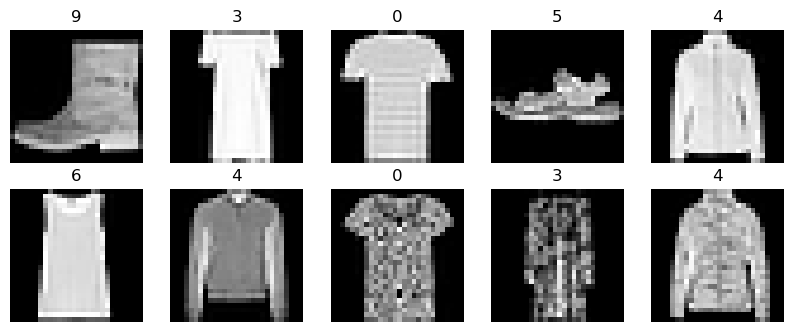

In [29]:
figure = plt.figure(figsize=(10, 10))
rows = 5
cols = 5
for i in range(0, rows+cols):
    ## selecting random index
    idx = torch.randint(len(train_data), size=(1,)).item()
    img, label = train_data[idx]
    figure.add_subplot(rows, cols, i+1)
    plt.title(label)
    plt.axis("off")
    ## making image 28x28
    plt.imshow(img.squeeze(), cmap='gray')
plt.show()

## Making a classification dataset using scikit learn

In [30]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=100, n_features=20)
print(f"Shape of dataset with features only : {X.shape}")

Shape of dataset with features only : (100, 20)


In [31]:
print(f"Datatype of X : {type(X)}")
print(f"Datatype of y : {type(y)}")

Datatype of X : <class 'numpy.ndarray'>
Datatype of y : <class 'numpy.ndarray'>


## Making a custom dataset

In [32]:
class CustomDataset(Dataset):
    def __init__(self, X, y):
        self.features = X
        self.labels = y

    def __len__(self):
        return (self.features.shape[0])
    
    def __getitem__(self, idx):
        feat = self.features[idx]
        lbl = self.labels[idx]
        return feat, lbl

In [33]:
data = CustomDataset(X, y)

In [34]:
## data type of data
type(data)

__main__.CustomDataset

In [35]:
print(len(data))

100


In [37]:
## taking out an example
print(f"Feature : {data[0][0]}")
print(f"Label : {data[0][1]}")

Feature : [-0.89089702  0.30237198  0.53958882 -0.87920763  0.60503437 -1.04879124
 -0.16519901  0.40850366  0.09935443  0.00480492  1.17803424  0.84464389
  0.08634274  0.21025192 -0.80275541  0.63268351  1.29898877 -0.20799168
 -0.64257834 -0.59649758]
Label : 1


## Dataloader to wrap an iterable over the dataset

In [40]:
dataloader = DataLoader(data, batch_size=25, shuffle=True)
print(dataloader)

In [45]:
features, labels = next(iter(dataloader))
print(f"Size of a batch : {features.shape[0]}")
print(f"Features : {features}")
print(f"Labels : {labels}")

Size of a batch : 25
Features : tensor([[-0.9093, -1.1951, -1.0844, -0.3028, -0.4331, -0.5316,  1.8983,  0.4026,
          0.3639,  0.3830,  0.5501, -0.7147, -0.0896, -1.0140,  0.8631,  1.0730,
          1.1615,  0.2433, -0.9021,  0.0989],
        [ 1.1174,  0.8630,  0.5883,  1.9559, -1.7856,  0.7825, -1.4036, -2.0751,
          1.2110,  0.5768,  1.1897,  1.2828, -0.1798,  0.1262,  1.2283,  0.8847,
         -0.0620,  0.0443,  0.0828, -0.1994],
        [-0.5575, -0.2086,  0.6315, -0.1873, -3.3673,  2.0737,  1.3140, -1.4210,
          0.7609, -0.3548,  1.2805,  0.0755, -2.2831,  1.2769,  0.8110,  0.9567,
         -1.0922,  2.7119, -0.3617,  0.5202],
        [ 2.4965, -0.4011, -0.0490,  0.1188,  0.3157, -0.1056, -1.0501, -0.5750,
         -0.8737, -0.1451, -0.3742, -0.3803,  0.6099,  1.0400,  0.1058, -0.1953,
         -0.0424,  0.7512, -1.1685,  1.3639],
        [-1.2269, -0.2343,  0.9315, -1.5801, -0.8611, -0.2546,  0.7336,  0.9388,
         -1.6701, -0.7215,  2.2827, -0.9247,  0.0315,  